In [1]:
#librerias
import numpy as np 
import pandas as pd
import seaborn as sns

from matplotlib import pyplot
from matplotlib import pyplot as plt

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

<html>
 <body>
<h1> Exploratory Data Analysis</h1>
<h2> Overview</h2>
<p> The main objective of the analysis is to detect an increase in the temperature of Barcelona in the last years (1780-2019). The data has been extracted from the OPEN DATA BCN platform, <a href="https://opendata-ajuntament.barcelona.cat/data/es/dataset/temperatures-hist-bcn">link here</a> </p>
<u></u>
<h2> Data Information</h2>
<p> In this case the columns are: <br/>
<u>Year</u><br/>
<u>Month</u><br/>
<u>Temperature</u><br/>
This data represents the measures of mean temperatures per month</p>
<hr width="50%" size="8" align="center"> <hr>
</body>
</html>
 

### Upload data


In [2]:
#Data
data = pd.read_csv('/Users/Alexandra/Documents/02_Curso_Data_Science/Proyecto_5_Final_Project/Temperaturas_Medianas_mensuales_del_aire_de_la_cuidad_Barcelona_desde_1780/temperaturesbarcelonadesde1780_format_long.csv')

In [3]:
print('Training data shape Temperatures: ', data.shape)

Training data shape Temperatures:  (2880, 4)


In [4]:
data.describe()

#min=01/1780
#max=12/2019

,Any,Mes,Temperatura
count,2880.000000,2880.000000,2880.000000
mean,1899.500000,6.500000,14.549792
std,69.293462,3.452652,5.518851
min,1780.000000,1.000000,2.500000
25%,1839.750000,3.750000,9.700000
50%,1899.500000,6.500000,13.900000
75%,1959.250000,9.250000,19.600000
max,2019.000000,12.000000,28.500000


In [5]:
data.head()

,Any,Mes,Desc_Mes,Temperatura
0,1780,1,Gener,6.7
1,1780,2,Febrer,7.3
2,1780,3,Març,11.6
3,1780,4,Abril,11.4
4,1780,5,Maig,16.3


##### Change column names

In [6]:
data.columns

Index(['Any', 'Mes', 'Desc_Mes', 'Temperatura'], dtype='object')

In [7]:
data=data.rename(columns={'Any':'year', 'Mes':'month','Desc_Mes':'month_name','Temperatura':'temperature'})
data.columns

Index(['year', 'month', 'month_name', 'temperature'], dtype='object')

## Exploratory Analysis


### Indexing data

In [8]:
data['dateInt']=data['year'].astype(str) + data['month'].astype(str).str.zfill(2)

data['date'] = pd.to_datetime(data['dateInt'], format='%Y%m')

data=data.drop(['dateInt'], axis=1)

data.head(5)

,year,month,month_name,temperature,date
0,1780,1,Gener,6.7,1780-01-01
1,1780,2,Febrer,7.3,1780-02-01
2,1780,3,Març,11.6,1780-03-01
3,1780,4,Abril,11.4,1780-04-01
4,1780,5,Maig,16.3,1780-05-01


In [9]:
index_data = data.set_index('date')
index_data

,year,month,month_name,temperature
date,,,,
1780-01-01,1780,1,Gener,6.7
1780-02-01,1780,2,Febrer,7.3
1780-03-01,1780,3,Març,11.6
1780-04-01,1780,4,Abril,11.4
1780-05-01,1780,5,Maig,16.3
1780-06-01,1780,6,Juny,19.1
1780-07-01,1780,7,Juliol,21.4
1780-08-01,1780,8,Agost,22.0
1780-09-01,1780,9,Setembre,20.3


##### Full Time Series Visualization

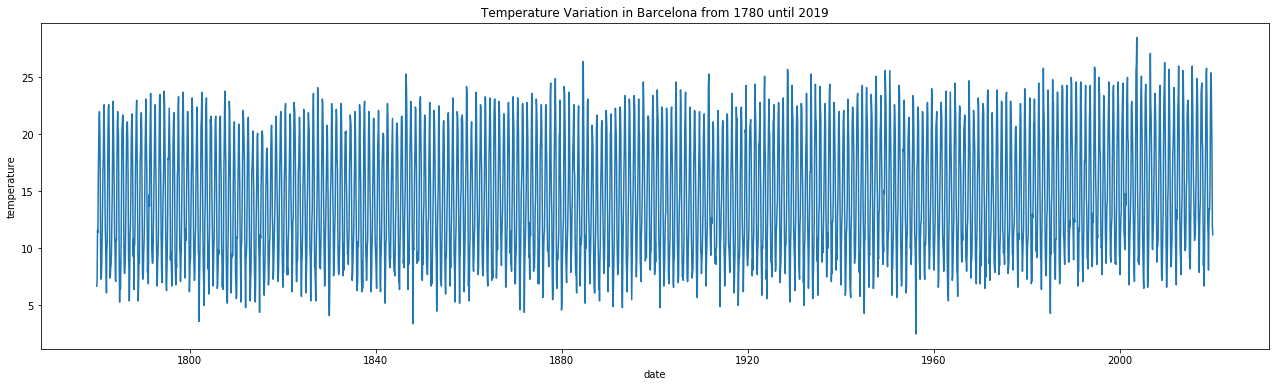

In [10]:
plt.figure(figsize=(22,6))
sns.lineplot(x=index_data.index, y=index_data.temperature)
plt.title('Temperature Variation in Barcelona from 1780 until 2019')
plt.show()


##### Results


<p>Many data to resume in this graph. It is not the correct one
    
</p>

<h2>Seasonality</h2>
<p> The series clearly has some seasonality, the higher temperatures are around November and February and the lower are between July and September. Just to make the things clear, I'll merge these lines into just one line, averaging the monthly levels: </p>
<u></u>

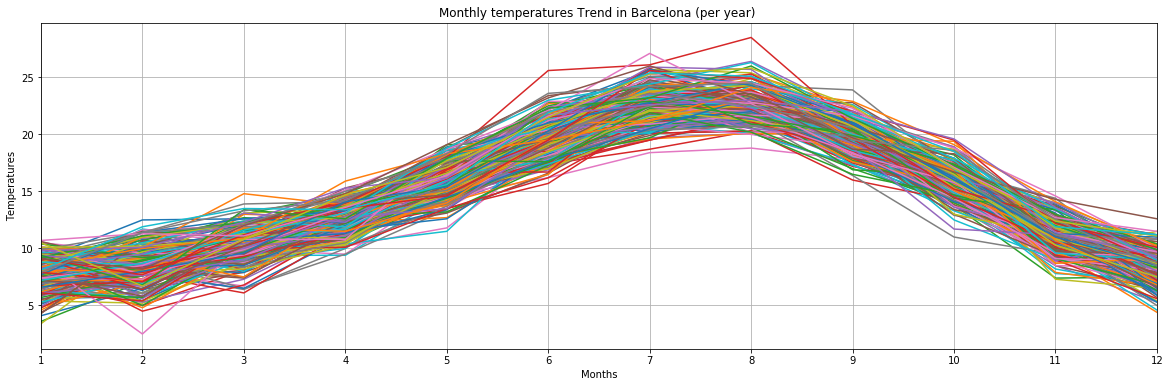

In [11]:
pivot= pd.pivot_table(data, values='temperature', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Monthly temperatures Trend in Barcelona (per year) ')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
pyplot.grid(True)
plt.legend().remove()
plt.show()

### Mean for each month (full time series for the 230 years)

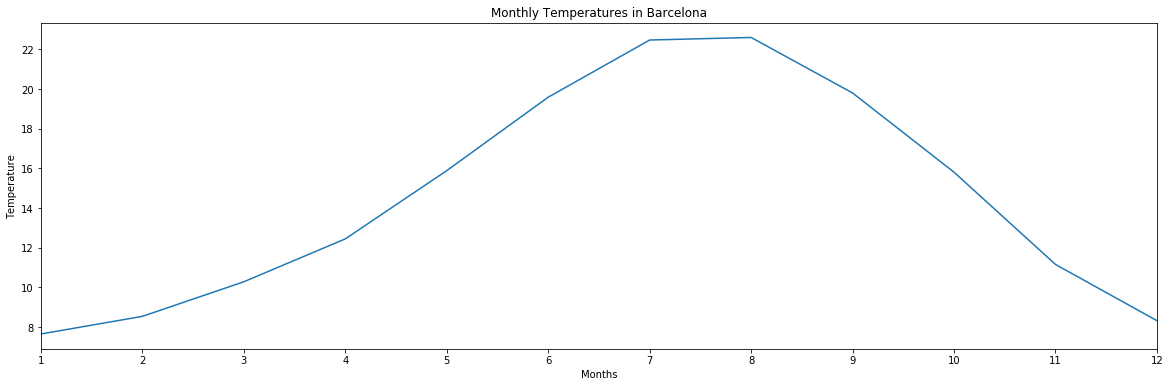

In [12]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Temperatures in Barcelona')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.savefig('002_Final_trend_Temperature_yearly_trend_by_month.png')
plt.show()

### Each month mean

In [13]:
print('Mean full time series: \n', monthly_seasonality)

Mean full time series: 
 month
1      7.655000
2      8.543333
3     10.287500
4     12.449583
5     15.890417
6     19.592917
7     22.474583
8     22.603333
9     19.804167
10    15.810417
11    11.160417
12     8.325833
dtype: float64


<h2>Trend</h2>
<p> Now i'm going to check if there is some trend through the years in this Series: 

I do it by finding the trend during the previous 10 years and comparing it with the following years
</p>

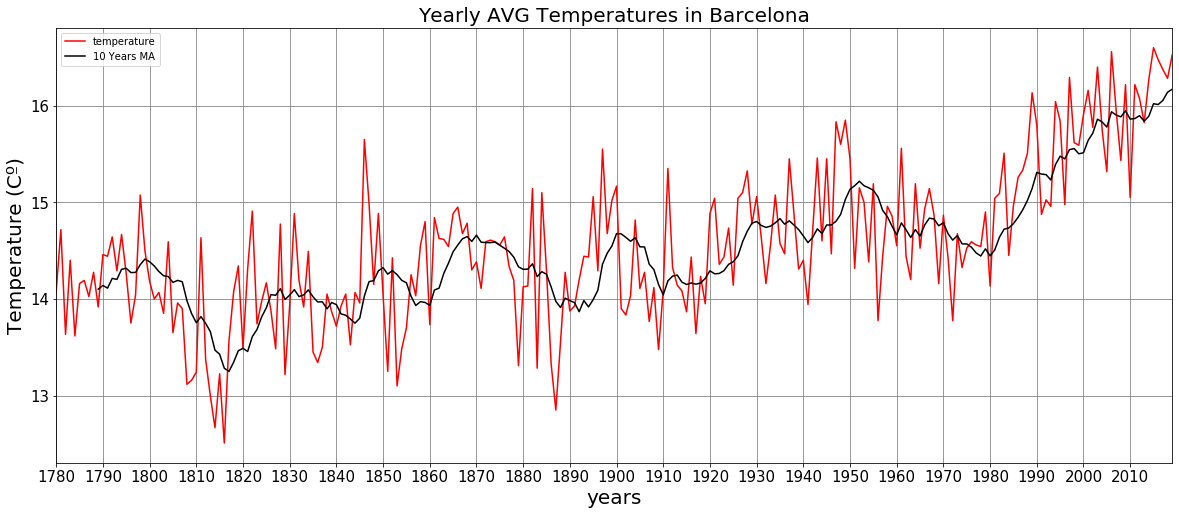

In [14]:
year_avg= pd.pivot_table(data, values='temperature', index='year', aggfunc='mean')
year_avg['10 Years MA'] = year_avg['temperature'].rolling(10).mean()
year_avg[['temperature','10 Years MA']].plot(figsize=(20,8), color= ['red','k'] )
plt.title('Yearly AVG Temperatures in Barcelona', fontsize=20)
plt.xlabel('years', fontsize=20)
plt.ylabel('Temperature (Cº)', fontsize=20)
plt.xticks([x for x in range(1780,2019,10)], size=15)
plt.yticks(size = 15)
pyplot.grid(True, color='grey')

### save plot bigger as twice

#plt.savefig('003_Yearly_AVG_Temperatures_in_Barcelona.png')

#plt.savefig("001_Yearly_AVG_Temperatures_in_Barcelona_presentation.png", dpi = 1000)
plt.show()

##### Results


<p>It's obvious looking at the graph that temperatura have raised in the last 40 years. Now I want to know how much has raised compared with the full time series mean
</p>

<h2>Mean for all time series</h2>
<p> I will take the calculation made on the last part (yearly pivot table). mean = ref_period
</p>

In [15]:
year_avg['ref_period'] = data.temperature.mean()
year_avg["diff"] = year_avg["temperature"] - year_avg["ref_period"]
year_avg.tail()

,temperature,10 Years MA,ref_period,diff
year,,,,
2015,16.600000,16.020000,14.549792,2.050208
2016,16.475000,16.011667,14.549792,1.925208
2017,16.375000,16.054167,14.549792,1.825208
2018,16.283333,16.139167,14.549792,1.733542
2019,16.525000,16.170000,14.549792,1.975208


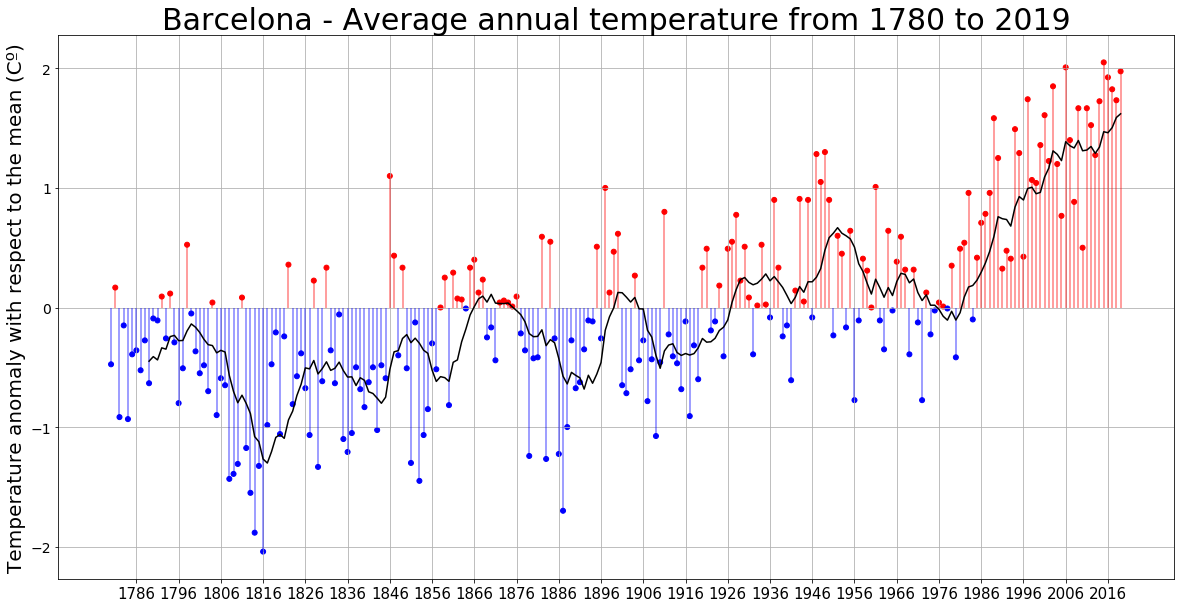

In [16]:
x = year_avg.index
y = year_avg['diff']
year_avg['10 Years diff'] = year_avg['diff'].rolling(10).mean()

#create a color if the group is "B"
my_color=np.where(y>=0, 'red', 'blue')
fig, ax = plt.subplots(figsize=(20, 10)) ### size of the plot

 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.5)
plt.scatter(x, y, color=my_color, s=25, alpha=1)
plt.xticks([x for x in range(1786,2019,10)],  size = 15)
plt.yticks(size = 14)
plt.plot(year_avg['10 Years diff'], 'k')
pyplot.grid(True)
 
# Add title and axis names
plt.title("Barcelona - Average annual temperature from 1780 to 2019", loc='center', fontsize=30)
plt.xlabel('')
plt.ylabel('Temperature anomaly with respect to the mean (Cº)', fontsize=20)
###
plt.savefig("002_Yearly_AVG_Temperatures_in_Barcelona__mean_presentation.png", dpi = 210)

<h5>Results</h5>
<p>Last 40 years have been the most warmer ones on history in Barcelona. Temperature in Barcelona has increase more than 1.8 compared with the actual mean of full time series
</p>

### Now I want to know the top 5 warmest years in Barcelona

In [17]:
## años más calurosos
print ('años más calurosos: \n',year_avg.nlargest(5, ['diff'])) 

## años más frios
print ('años más frios: \n',year_avg.nsmallest(5, ['diff'])) 


años más calurosos: 
       temperature  10 Years MA  ref_period      diff  10 Years diff
year                                                               
2015    16.600000    16.020000   14.549792  2.050208       1.470208
2006    16.558333    15.936667   14.549792  2.008542       1.386875
2019    16.525000    16.170000   14.549792  1.975208       1.620208
2016    16.475000    16.011667   14.549792  1.925208       1.461875
2003    16.400000    15.860000   14.549792  1.850208       1.310208
años más frios: 
       temperature  10 Years MA  ref_period      diff  10 Years diff
year                                                               
1816    12.508333    13.282500   14.549792 -2.041458      -1.267292
1814    12.666667    13.470000   14.549792 -1.883125      -1.079792
1887    12.850000    13.975000   14.549792 -1.699792      -0.574792
1813    13.000000    13.662500   14.549792 -1.549792      -0.887292
1853    13.100000    14.250833   14.549792 -1.449792      -0.298958


## Temperature increase by season

In [18]:
global_temp = data[['date', 'temperature']]

global_temp['Data'] = pd.to_datetime(global_temp['date'])
global_temp['year'] = global_temp['date'].map(lambda x: x.year)
global_temp['month'] = global_temp['date'].map(lambda x: x.month)

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = global_temp['year'].min()
max_year = global_temp['year'].max()
years = range(min_year, max_year + 1)

global_temp['season'] = global_temp['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temp[global_temp['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['temperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['temperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['temperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['temperature'].mean())

## Summer


Text(0, 0.5, 'Summer Temperature anomaly compared with the mean')

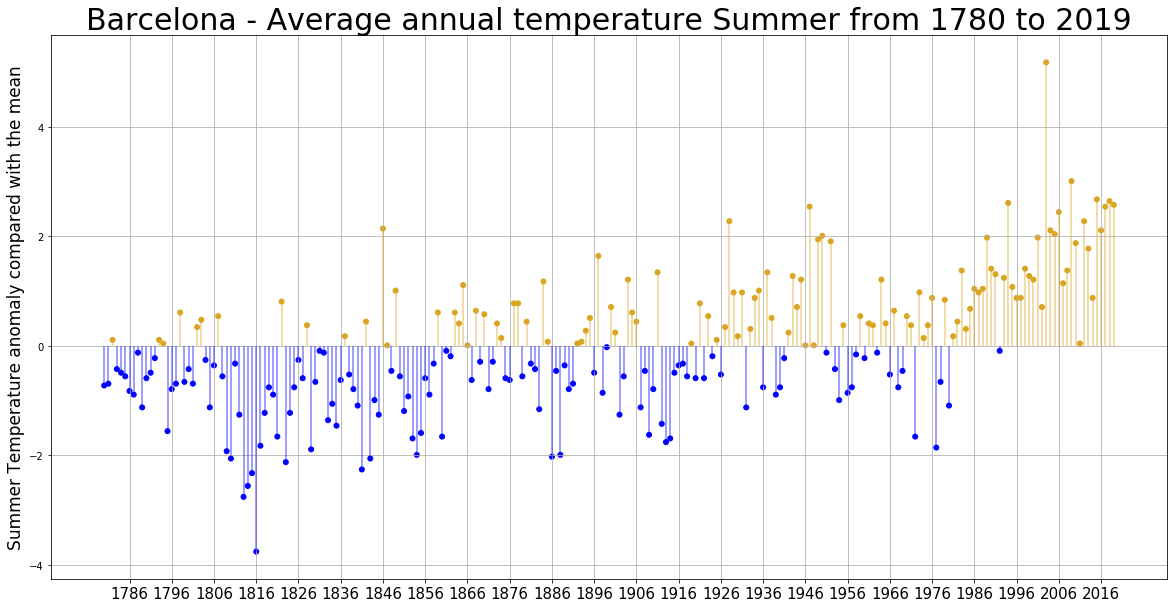

In [19]:
# dataframe summer

summer = pd.DataFrame(list(zip(year_avg.index.tolist(), summer_temps)), 
               columns =['year', 'temperature'])

summer = summer.set_index('year')
#print(summer_t.tail(10))
ref_period_summer=summer.temperature.mean()
summer["diff"] = summer["temperature"] - ref_period_summer
## mean temperature on summer by year
#print(summer_t.head())

### visualization
x = summer.index
y = summer['diff']
 
# Create a color if the group is "B"
my_color=np.where(y>=0, 'goldenrod', 'blue')
fig, ax = plt.subplots(figsize=(20, 10)) ### size of the plot

 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.5)
plt.scatter(x, y, color=my_color, s=25, alpha=1)
plt.xticks([x for x in range(1786,2019,10)],  size = 15)
#plt.plot(year_avg['10 Years diff'], 'k')
pyplot.grid(True)
 
# Add title and axis names
plt.title("Barcelona - Average annual temperature Summer from 1780 to 2019", loc='center', fontsize=30)
plt.xlabel('')
plt.ylabel('Summer Temperature anomaly compared with the mean', fontsize=17)


### Now I want to know the top 5 warmest summers years in Barcelona

In [20]:
## años más calurosos
print ('warmest years: \n',summer.nlargest(5, ['diff'])) 

## años más frios
print ('coldest years: \n',summer.nsmallest(5, ['diff'])) 


warmest years: 
       temperature      diff
year                       
2003    26.733333  5.176389
2009    24.566667  3.009722
2015    24.233333  2.676389
2018    24.200000  2.643056
1994    24.166667  2.609722
coldest years: 
       temperature      diff
year                       
1816    17.800000 -3.756944
1813    18.800000 -2.756944
1814    19.000000 -2.556944
1815    19.233333 -2.323611
1841    19.300000 -2.256944


## Spring

Text(0, 0.5, 'Summer Temperature anomaly compared with the mean')

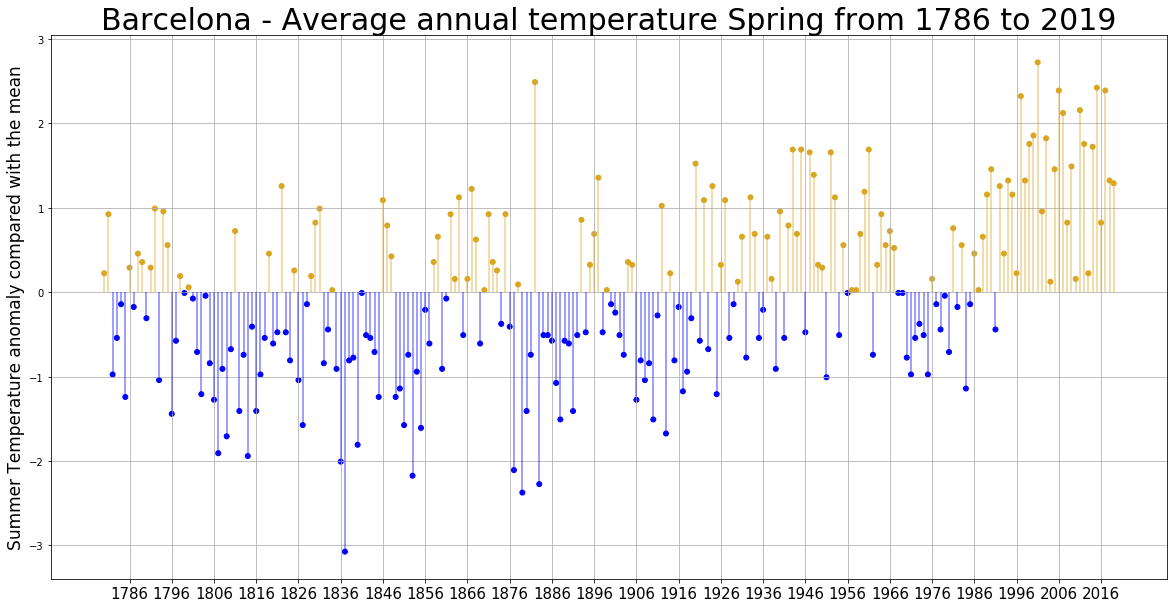

In [21]:
# dataframe spring
spring = pd.DataFrame(list(zip(year_avg.index.tolist(), spring_temps)), 
               columns =['year', 'temperature'])

spring = spring.set_index('year')
#print(summer_t.tail(10))
ref_period_spring=spring.temperature.mean()
spring["diff"] = spring["temperature"] - ref_period_spring
## mean temperature on summer by year
#print(summer_t.head())

### visualization
x = spring.index
y = spring['diff']
 
# Create a color if the group is "B"
my_color=np.where(y>=0, 'goldenrod', 'blue')
fig, ax = plt.subplots(figsize=(20, 10)) ### size of the plot

 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.5)
plt.scatter(x, y, color=my_color, s=25, alpha=1)
plt.xticks([x for x in range(1786,2019,10)],  size = 15)
#plt.plot(year_avg['10 Years diff'], 'k')
pyplot.grid(True)
 
# Add title and axis names
plt.title("Barcelona - Average annual temperature Spring from 1786 to 2019", loc='center', fontsize=30)
plt.xlabel('')
plt.ylabel('Summer Temperature anomaly compared with the mean', fontsize=17)


### Now I want to know the top 5 warmest spring years in Barcelona

In [22]:

## años más calurosos
print ('warmest years: \n',spring.nlargest(5, ['diff'])) 

## años más frios
print ('coldest years: \n',spring.nsmallest(5, ['diff'])) 


warmest years: 
       temperature      diff
year                       
2001    15.600000  2.724167
1882    15.366667  2.490833
2015    15.300000  2.424167
2006    15.266667  2.390833
2017    15.266667  2.390833
coldest years: 
       temperature      diff
year                       
1837     9.800000 -3.075833
1879    10.500000 -2.375833
1883    10.600000 -2.275833
1853    10.700000 -2.175833
1877    10.766667 -2.109167


## Winter

Text(0, 0.5, 'Summer Temperature anomaly compared with the mean')

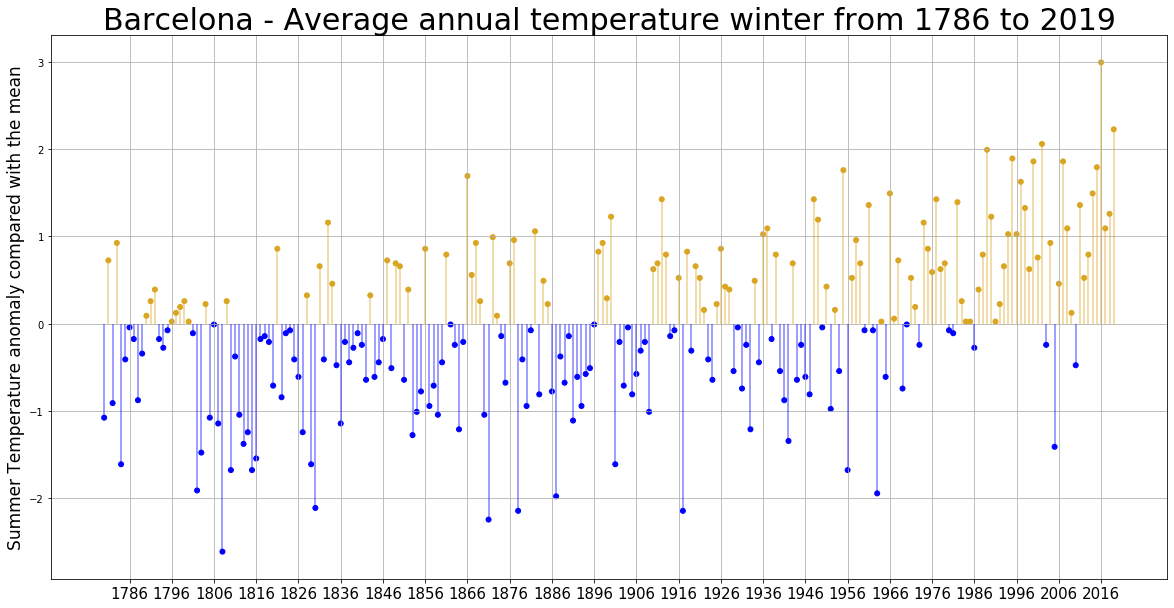

In [23]:
# dataframe winter

winter = pd.DataFrame(list(zip(year_avg.index.tolist(), winter_temps)), 
               columns =['year', 'temperature'])

winter = winter.set_index('year')
#print(summer_t.tail(10))
ref_period_winter=winter.temperature.mean()
winter["diff"] = winter["temperature"] - ref_period_winter
## mean temperature on summer by year
#print(summer_t.head())

### visualization
x = winter.index
y = winter['diff']
 
# Create a color if the group is "B"
my_color=np.where(y>=0, 'goldenrod', 'blue')
fig, ax = plt.subplots(figsize=(20, 10)) ### size of the plot

 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.5)
plt.scatter(x, y, color=my_color, s=25, alpha=1)
plt.xticks([x for x in range(1786,2019,10)],  size = 15)
#plt.plot(year_avg['10 Years diff'], 'k')
pyplot.grid(True)
 
# Add title and axis names
plt.title("Barcelona - Average annual temperature winter from 1786 to 2019", loc='center', fontsize=30)
plt.xlabel('')
plt.ylabel('Summer Temperature anomaly compared with the mean', fontsize=17)

### Now I want to know the top 5 warmest winters years in Barcelona

In [24]:
## años más calurosos
print ('Warmest years: \n',winter.nlargest(5, ['diff'])) 

## años más frios
print ('coldest years: \n',winter.nsmallest(5, ['diff'])) 


Warmest years: 
       temperature      diff
year                       
2016    11.166667  2.991944
2019    10.400000  2.225278
2002    10.233333  2.058611
1989    10.166667  1.991944
1995    10.066667  1.891944
coldest years: 
       temperature      diff
year                       
1808     5.566667 -2.608056
1871     5.933333 -2.241389
1878     6.033333 -2.141389
1917     6.033333 -2.141389
1830     6.066667 -2.108056


## Autumn

Text(0, 0.5, 'Summer Temperature anomaly compared with the mean')

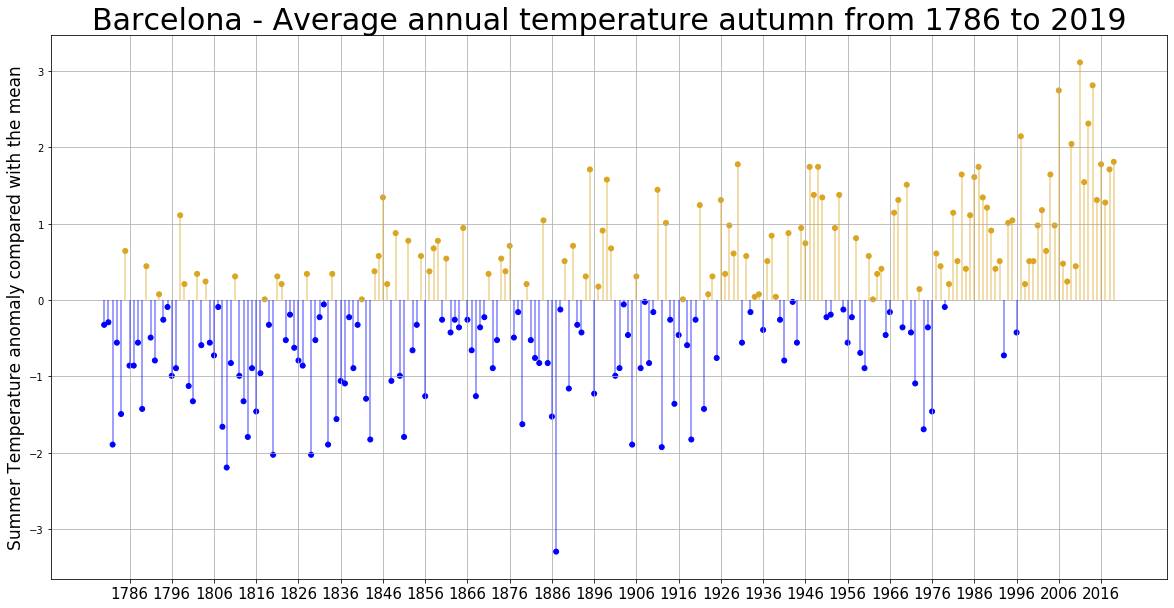

In [25]:
# dataframe summer

autumn = pd.DataFrame(list(zip(year_avg.index.tolist(), autumn_temps)), 
               columns =['year', 'temperature'])

autumn = autumn.set_index('year')
#print(summer_t.tail(10))
ref_period_autumn=autumn.temperature.mean()
autumn["diff"] = autumn["temperature"] - ref_period_autumn
## mean temperature on summer by year
#print(summer_t.head())

### visualization
x = autumn.index
y = autumn['diff']
 
# Create a color if the group is "B"
my_color=np.where(y>=0, 'goldenrod', 'blue')
fig, ax = plt.subplots(figsize=(20, 10)) ### size of the plot

 
# The vertival plot is made using the hline function
# I load the seaborn library only to benefit the nice looking feature
import seaborn as sns
plt.vlines(x=x, ymin=0, ymax=y, color=my_color, alpha=0.5)
plt.scatter(x, y, color=my_color, s=25, alpha=1)
plt.xticks([x for x in range(1786,2019,10)],  size = 15)
#plt.plot(year_avg['10 Years diff'], 'k')
pyplot.grid(True)
 
# Add title and axis names
plt.title("Barcelona - Average annual temperature autumn from 1786 to 2019", loc='center', fontsize=30)
plt.xlabel('')
plt.ylabel('Summer Temperature anomaly compared with the mean', fontsize=17)

### Now I want to know the top 5 warmest autumn  years in Barcelona

In [26]:
## años más calurosos
print ('warmest years: \n',autumn.nlargest(5, ['diff'])) 

## años más frios
print ('coldest years: \n',autumn.nsmallest(5, ['diff'])) 


warmest years: 
       temperature      diff
year                       
2011    18.700000  3.108333
2014    18.400000  2.808333
2006    18.333333  2.741667
2013    17.900000  2.308333
1997    17.733333  2.141667
coldest years: 
       temperature      diff
year                       
1887    12.300000 -3.291667
1809    13.400000 -2.191667
1820    13.566667 -2.025000
1829    13.566667 -2.025000
1912    13.666667 -1.925000
